In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data=pd.read_csv("C:/Users/Likith/Downloads/matches.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [3]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


if we want to use only certain columns we  use this code

In [5]:
data[['dl_applied','win_by_runs','win_by_wickets']].describe()

,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000
mean,0.025132,13.283069,3.350529
std,0.156630,23.471144,3.387963
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,4.000000
75%,0.000000,19.000000,6.000000
max,1.000000,146.000000,10.000000


In [6]:
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

//    irow is used to select a specific row(s), -1 will be used for the last row, 0-9 for first

In [7]:
data=data.iloc[:,:-1]
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [9]:
data['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [10]:
#for delhi replace 
data['team1']=data['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
data['team2']=data['team2'].str.replace( 'Delhi Daredevils','Delhi Capitals') 
data['winner']=data['winner'].str.replace('Delhi Daredevils','Delhi Capitals')

In [11]:
data['team1']=data['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
data['team2']=data['team2'].str.replace( 'Deccan Chargers', 'Sunrisers Hyderabad') 
data['winner']=data['winner'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

In [12]:
data['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Rising Pune Supergiants'], dtype=object)

Text(0.5, 1.0, 'Number of IPL matches won by each team')

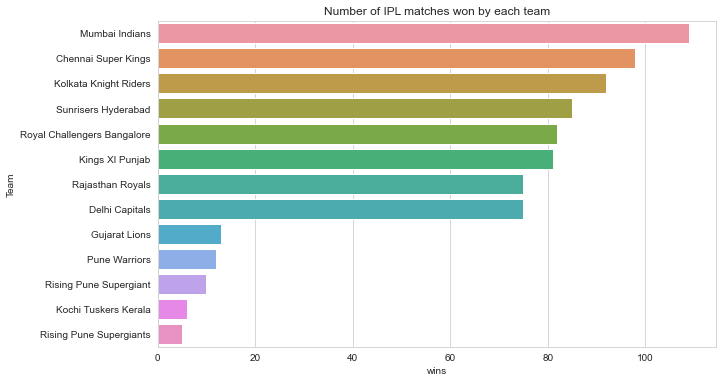

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(y='winner',data=data,order=data['winner'].value_counts().index)
plt.xlabel('wins')
plt.ylabel('Team')
plt.title('Number of IPL matches won by each team')

Text(0.5, 1.0, 'Total Number of Matches Played in different stadiums')

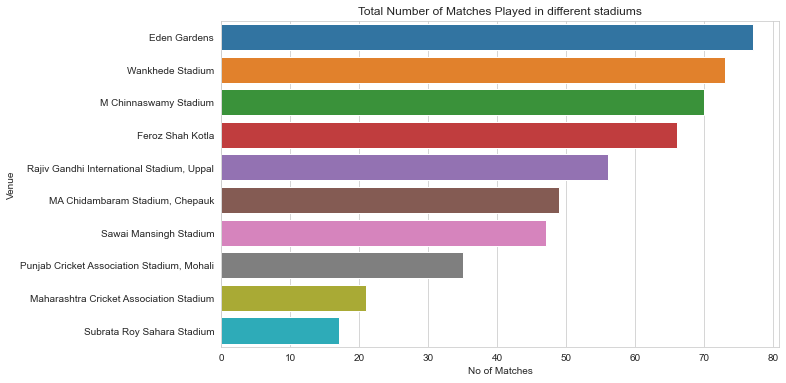

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(y='venue',data=data,order=data['venue'].value_counts().iloc[:10].index)
plt.xlabel('No of Matches')
plt.ylabel('Venue')
plt.title('Total Number of Matches Played in different stadiums')

Text(0.5, 1.0, 'Toss decision')

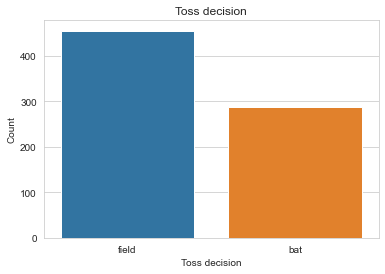

In [15]:
plt.Figure(figsize=(10,6))
sns.countplot(x="toss_decision",data=data)
plt.xlabel("Toss decision")
plt.ylabel("Count")
plt.title("Toss decision")

In [16]:
data.drop(['id','venue','city','date','umpire1','umpire2','season','player_of_match'],axis=1,inplace=True)

In [17]:
data

,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9
...,...,...,...,...,...,...,...,...,...
750,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6
751,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9
752,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6
754,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6


In [18]:
x=data.drop(['winner'],axis=1)
y=data['winner']

In [20]:
prefix = ['team1_', 'team2_', 'toss_winner_', 'toss_decision_', 'result_']

In [21]:
# Encode ALL data first to ensure consistent features
x = pd.get_dummies(x, columns=['team1', 'team2', 'toss_winner', 'toss_decision', 'result'], 
                   prefix=prefix,drop_first=True)

# Split into train/test AFTER encoding
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
# --- DELETE THESE LINES ---
non_numeric_columns = x_test.select_dtypes(include=['object']).columns
x_test = pd.get_dummies(x_test, columns=non_numeric_columns)
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

In [23]:
x

,dl_applied,win_by_runs,win_by_wickets,team1__Delhi Capitals,team1__Gujarat Lions,team1__Kings XI Punjab,team1__Kochi Tuskers Kerala,team1__Kolkata Knight Riders,team1__Mumbai Indians,team1__Pune Warriors,...,toss_winner__Kolkata Knight Riders,toss_winner__Mumbai Indians,toss_winner__Pune Warriors,toss_winner__Rajasthan Royals,toss_winner__Rising Pune Supergiant,toss_winner__Rising Pune Supergiants,toss_winner__Royal Challengers Bangalore,toss_winner__Sunrisers Hyderabad,toss_decision__field,result__tie
0,0,35,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,7,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,10,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
751,0,0,9,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
752,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
754,0,0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [25]:
y


array([12,  9,  5,  3, 12,  6,  3,  1,  6,  5,  6,  2,  5,  1,  6,  9,  5,
       12, 11, 12,  6,  2,  6,  9,  3,  5,  9,  5,  2,  5, 12,  9,  6,  3,
       12,  6,  9,  1,  9,  1,  3,  9,  6,  5,  2, 12,  3,  1,  3,  1, 12,
        6,  9, 11,  9,  5,  6,  6,  5,  0,  1, 11,  5,  8,  1,  0,  8,  3,
        8,  0, 12,  3,  0,  6,  1,  3,  8,  1, 11,  3,  6,  8,  3, 12,  6,
        0,  5,  8,  6,  0,  5,  8,  3,  5,  6,  3,  1,  6,  3,  8,  6,  0,
        1,  8,  3, 11,  3,  1,  8, 11,  5,  8,  0,  8,  0,  8,  6, 11,  1,
       12,  0,  5, 12,  1,  8,  3, 12,  1,  3, 12,  6,  8, 11,  3,  1,  0,
        6, 11,  8,  0,  3, 11,  0,  8,  1, 12,  8,  0,  1,  3,  0,  6,  1,
       12, 11,  6,  1, 11,  8,  3,  0, 12,  3,  1,  5, 11,  5,  0,  1, 11,
       12, 11, 12,  5,  6,  1,  5, 12,  1, 11,  0,  6, 11,  0, 12,  8, 11,
       12,  3,  6, 11,  8,  6,  8,  5,  1,  8,  6,  1,  6,  0,  1,  5, 11,
        0,  6,  3,  1,  8,  0,  8,  5, 12,  3, 12, 11,  3,  6, 12,  6,  0,
       11,  1, 12,  6,  5

In [30]:
# Train model
model = RandomForestClassifier(n_estimators=200, min_samples_split=3, max_features="auto", random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=3, n_estimators=200, random_state=42)

In [31]:
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Predicted Winners:", le.inverse_transform(y_pred))

Accuracy: 0.7495798319327731
Predicted Winners: ['Royal Challengers Bangalore' 'Kings XI Punjab'
 'Royal Challengers Bangalore' 'Mumbai Indians' 'Mumbai Indians'
 'Kings XI Punjab' 'Chennai Super Kings' 'Rajasthan Royals'
 'Kings XI Punjab' 'Sunrisers Hyderabad' 'Sunrisers Hyderabad'
 'Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Sunrisers Hyderabad'
 'Chennai Super Kings' 'Kolkata Knight Riders' 'Mumbai Indians'
 'Royal Challengers Bangalore' 'Mumbai Indians' 'Mumbai Indians'
 'Chennai Super Kings' 'Kolkata Knight Riders' 'Mumbai Indians'
 'Rajasthan Royals' 'Sunrisers Hyderabad' 'Kings XI Punjab'
 'Sunrisers Hyderabad' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Chennai Super Kings' 'Rajasthan Royals' 'Mumbai Indians'
 'Sunrisers Hyderabad' 'Chennai Super Kings' 'Rajasthan Royals'
 'Rajasthan Royals' 'Sunrisers Hyderabad' 'Chennai Super Kings'
 'Mumbai Indians' 'Kings XI Punjab' 'Mumbai Indians' 'Rajasthan Royals'
 'Chennai Super Kings' 'Mumbai Indians' 'Mumbai Indians'
 'Roy

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
# Check class distribution
unique, counts = np.unique(y, return_counts=True)
print("Class distribution:", dict(zip(le.inverse_transform(unique), counts)))

# Check for classes missing in predictions
missing_classes = set(np.unique(y_test)) - set(np.unique(y_pred))
if missing_classes:
    print("Classes never predicted:", le.inverse_transform(list(missing_classes)))

Class distribution: {'Chennai Super Kings': 98, 'Delhi Capitals': 75, 'Gujarat Lions': 13, 'Kings XI Punjab': 81, 'Kochi Tuskers Kerala': 6, 'Kolkata Knight Riders': 92, 'Mumbai Indians': 109, 'Pune Warriors': 12, 'Rajasthan Royals': 75, 'Rising Pune Supergiant': 10, 'Rising Pune Supergiants': 5, 'Royal Challengers Bangalore': 82, 'Sunrisers Hyderabad': 85}
Classes never predicted: ['Rising Pune Supergiant']


In [35]:
model = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=3,
    max_features="auto",
    class_weight='balanced',  # <-- Add this
    random_state=42
)

In [36]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 440 to 265
Data columns (total 43 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   dl_applied                                148 non-null    int64
 1   win_by_runs                               148 non-null    int64
 2   win_by_wickets                            148 non-null    int64
 3   team1__Delhi Capitals                     148 non-null    uint8
 4   team1__Gujarat Lions                      148 non-null    uint8
 5   team1__Kings XI Punjab                    148 non-null    uint8
 6   team1__Kochi Tuskers Kerala               148 non-null    uint8
 7   team1__Kolkata Knight Riders              148 non-null    uint8
 8   team1__Mumbai Indians                     148 non-null    uint8
 9   team1__Pune Warriors                      148 non-null    uint8
 10  team1__Rajasthan Royals                   148 non-null    ui

In [37]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2,
    stratify=y,  # <-- Preserve class distribution
    random_state=42
)

In [38]:
model.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', min_samples_split=3,
                       n_estimators=200, random_state=42)

In [39]:
non_numeric_columns = x_test.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index([], dtype='object')


In [40]:
# Use pandas get_dummies for one-hot encoding
x_test = pd.get_dummies(x_test, columns=non_numeric_columns)

# Ensure that x_train and x_test have the same columns after one-hot encoding
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

# Now you can make predictions
y_pred = model.predict(x_test)
print(y_pred)


[11  6 10  8  6 12  0  0  1  9 11  5  0  2  0  5  6  6  8  3  0  0  8 12
  3  8  1  3  5  6 11  3  6  1  6 12  3 11  5  6 12  6  6  1  1  0 12  5
  0  3  0  6 11  0 12 11  8 11  1  6  0  0  0  1  6  5  8  6  0  6  6  5
  5  1  0  8  6  3 11  5  5  8  0  3  5  6  0 12 12  3  0  1 11  1  3  3
  5  6  0  0 11  8  8  5 12  5 11 12  5  2 12 11  6  0 11 12  1  5  5  1
 11  1  8  4 12 12  8  8  3  8 12  3  0  1  1  9  2  3  8  3 11  5  3 11
 12 12  0  0 12]


In [41]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))



Classification Report:
                             precision    recall  f1-score   support

        Chennai Super Kings       0.79      0.95      0.86        20
             Delhi Capitals       1.00      1.00      1.00        15
              Gujarat Lions       0.67      0.67      0.67         3
            Kings XI Punjab       0.94      0.94      0.94        16
       Kochi Tuskers Kerala       1.00      1.00      1.00         1
      Kolkata Knight Riders       1.00      0.95      0.97        19
             Mumbai Indians       1.00      0.91      0.95        22
              Pune Warriors       0.00      0.00      0.00         2
           Rajasthan Royals       1.00      1.00      1.00        15
     Rising Pune Supergiant       1.00      1.00      1.00         2
    Rising Pune Supergiants       1.00      1.00      1.00         1
Royal Challengers Bangalore       1.00      1.00      1.00        16
        Sunrisers Hyderabad       0.94      1.00      0.97        17

        

C:\Users\Likith\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Likith\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Likith\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

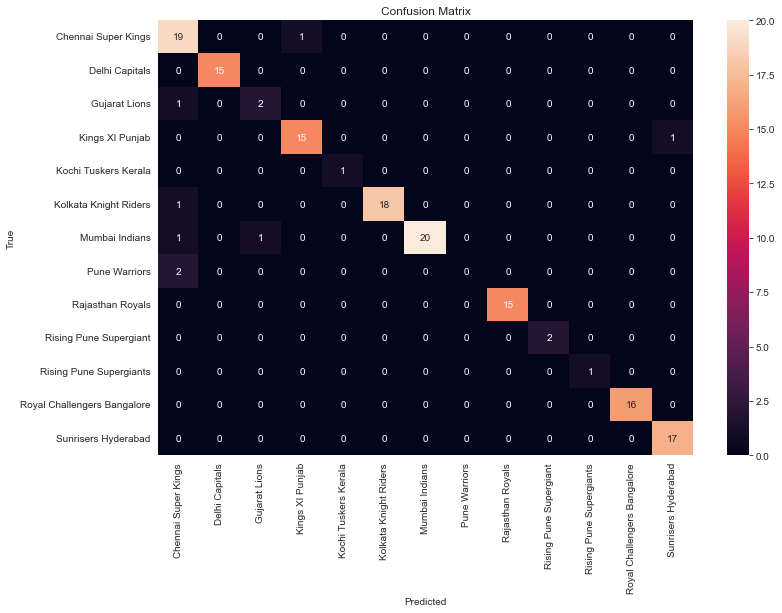

In [42]:

# Confusion Matrix (simplified)
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

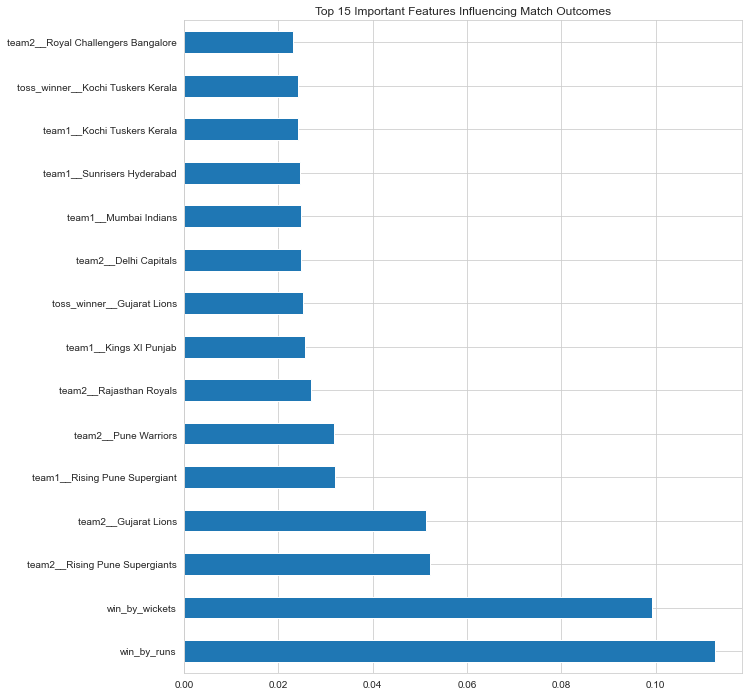

In [43]:

# --- Feature Importance ---
feature_importance = pd.Series(model.feature_importances_, index=x_train.columns)
plt.figure(figsize=(10,12))
feature_importance.nlargest(15).plot(kind='barh')
plt.title('Top 15 Important Features Influencing Match Outcomes')
plt.show()

In [44]:
def predict_winner(team1, team2, toss_winner, toss_decision, result):
    # Create DataFrame with input data
    new_match = pd.DataFrame({
        'team1': [team1],
        'team2': [team2],
        'toss_winner': [toss_winner],
        'toss_decision': [toss_decision],
        'result': [result]
    })
    
    # One-hot encode using the same columns as training data
    new_match_encoded = pd.get_dummies(new_match)
    new_match_encoded = new_match_encoded.reindex(columns=x_train.columns, fill_value=0)
    
    # Predict
    prediction = model.predict(new_match_encoded)
    return le.inverse_transform(prediction)[0]

In [45]:
# Example Prediction
print("\nExample Prediction:")
predicted_winner = predict_winner(
    team1='Mumbai Indians',
    team2='Chennai Super Kings',
    toss_winner='Mumbai Indians',
    toss_decision='bat',
    result='normal'
)
print(f"Predicted Winner: {predicted_winner}")


Example Prediction:
Predicted Winner: Chennai Super Kings
